# Systems with Machine Learning 
## Laboratories 2 - Data Preperation

Dataset: https://www.kaggle.com/datasets/frabbisw/facial-age?resource=download

#### Import needed libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import keras
import tensorflow as tf
import time
from collections import Counter
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image

#### Set needed constat variabels linked to dataset

In [99]:
DS_ROOT = os.path.join("./newface/face_age")
print(DS_ROOT)

./newface/face_age


#### Create DataFrame with images labels and paths

In [100]:
labels, paths = [], []
for label in sorted(os.listdir(DS_ROOT), key=int):
    images_dirs = os.listdir(os.path.join(DS_ROOT, label))
    labels.extend([int(label) for _ in range(len(images_dirs))])
    paths.extend(list(map(lambda dir: os.path.join(DS_ROOT, label, dir), images_dirs)))

df = pd.DataFrame({
    'label': labels,
    'path': paths,
})
df.head(10)

,label,path
0,1,./newface/face_age\001\1000.png
1,1,./newface/face_age\001\1018.png
2,1,./newface/face_age\001\1030.png
3,1,./newface/face_age\001\1062.png
4,1,./newface/face_age\001\1068.png
5,1,./newface/face_age\001\1075.png
6,1,./newface/face_age\001\1077.png
7,1,./newface/face_age\001\1081.png
8,1,./newface/face_age\001\1087.png
9,1,./newface/face_age\001\1089.png


### Plot some example images from created DataFrame

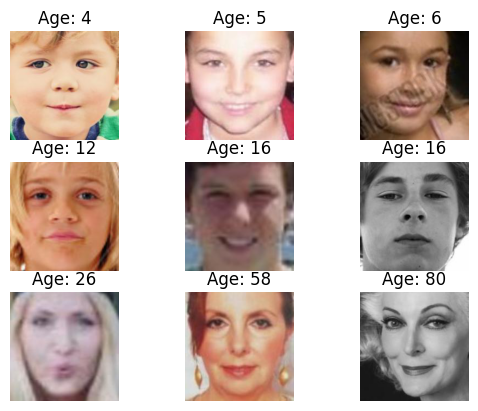

In [102]:
rows, cols = 3, 3
rand_imgs = df.sample(n=cols*rows).sort_values(by='label')

fig = plt.figure()
for i, (_, row) in enumerate(rand_imgs.iterrows()):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(Image.open(row['path']))
    plt.title(f"Age: {row['label']}")
    plt.axis('off')
plt.show()

### Remove classes with less than 2 examples

In [103]:
counter = Counter(df['label'])
for key, value in counter.items():
    if value >= 2:
        continue
    df = df[df['label'] != key]
df.reset_index(inplace=True)

#### Load images pixels based on theirs paths (COULD TAKE SOME TIME)

In [104]:
X, y = [], df['label'].to_numpy()
for i, row in df.iterrows():
    image = Image.open(row['path']).convert('RGB').resize((150, 150))
    X.append(np.array(image).astype(np.float32))
    image.close()
X = np.array(X)
X /= 255.0
print('X: ', X.shape)
print('y: ', y.shape)

X:  (9776, 150, 150, 3)
y:  (9776,)


#### Plot ImageDataGenerator usage with loaded dataset

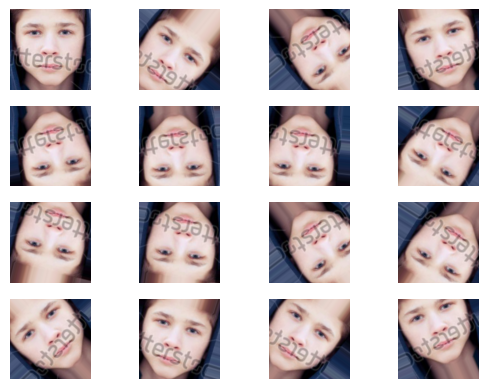

In [105]:
shift, rotation_range = 0.15, 45
data_generator = ImageDataGenerator(
    rotation_range=rotation_range,
    width_shift_range=shift,
    height_shift_range=shift,
    horizontal_flip=True,
    vertical_flip=True
)

rows, cols = 4, 4
count = rows * cols
img = X[np.random.randint(len(X))]
fig = plt.figure()
fig.add_subplot(rows, cols, 1)
plt.imshow(img)
plt.axis('off')

img = img.reshape((1,) + img.shape)
gen = data_generator.flow(img, batch_size=1)
for i in range(2, count+1):
    im = next(gen)
    im = im.reshape(im.shape[1:])
    fig.add_subplot(rows, cols, i)
    plt.imshow(im)
    plt.axis('off')
plt.show()

#### Split dataset into train, validate and test subsets

In [167]:
train_size, val_size, test_size = 0.75, 0.1, 0.15 

# SPLIT 1
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size/(train_size+val_size), shuffle=True, stratify=y_train)
split_1 = {
    'x_train': x_train, 'y_train': y_train,
    'x_val': x_val, 'y_val': y_val,
    'x_test': x_test, 'y_test': y_test
}

# SPLIT 2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size/(train_size+val_size), shuffle=True, stratify=y_train)
split_2 = {
    'x_train': x_train, 'y_train': y_train,
    'x_val': x_val, 'y_val': y_val,
    'x_test': x_test, 'y_test': y_test
}

# SPLIT 3
split_3 = {
    'x_train': np.append(x_train, x_val, 0), 'y_train': np.append(y_train, y_val, 0),
    'x_test': x_test, 'y_test': y_test
}

print(f"Train shapes: {split_1['x_train'].shape} <{len(split_1['x_train'])/len(X):.2f}> | {split_2['x_train'].shape} <{len(split_2['x_train'])/len(X):.2f}> | {split_3['x_train'].shape} <{len(split_3['x_train'])/len(X):.2f}>")
print(f"Test shapes: {split_1['x_test'].shape} <{len(split_1['x_test'])/len(X):.2f}> | {split_2['x_test'].shape} <{len(split_2['x_test'])/len(X):.2f}> | {split_3['x_test'].shape} <{len(split_3['x_test'])/len(X):.2f}>")
print(f"Val shapes: {split_1['x_val'].shape} <{len(split_1['x_val'])/len(X):.2f}> | {split_2['x_val'].shape} <{len(split_1['x_val'])/len(X):.2f}>")

Train shapes: (7331, 150, 150, 3) <0.75> | (7331, 150, 150, 3) <0.75> | (8309, 150, 150, 3) <0.85>
Test shapes: (1467, 150, 150, 3) <0.15> | (1467, 150, 150, 3) <0.15> | (1467, 150, 150, 3) <0.15>
Val shapes: (978, 150, 150, 3) <0.10> | (978, 150, 150, 3) <0.10>


#### Create CNN AI models

In [136]:
model = keras.Sequential((
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), input_shape=in_shape[1:], activation="relu", padding="valid"),
    keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="linear")
))

in_shape = split_1['x_train'].shape
batch_size = 10
epochs = 1

model.compile(
    optimizer=keras.optimizers.Adam(), 
    loss=keras.losses.MeanSquaredError(), 
    metrics=['mean_absolute_error'] 
)

training_start = time.time()
history = model.fit(
    split_1['x_train'], split_1['y_train'], 
    validation_data=(split_1['x_val'], split_1['y_val']),
    epochs=epochs,
    steps_per_epoch=len(split_1['x_train']) // batch_size,
    validation_steps=len(split_1['x_val']) // batch_size
)
training_time = time.time() - training_start

print(f'Training time: {training_time:.2f} seconds\nMean {(training_time/epochs):.2f} seconds per epoch')

734/734 [==============================] - 101s 138ms/step - loss: 416.7598 - mean_absolute_error: 16.0278 - val_loss: 279.5910 - val_mean_absolute_error: 12.8055
Training time: 101.53 seconds
Mean 101.53 seconds per epoch


# Model 2

In [168]:
split_2_prime = np.load("split_2.npz", allow_pickle = True)['arr_0'].item()

In [199]:
in_shape = split_2_prime['x_train'].shape

model = keras.Sequential((
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), input_shape=in_shape[1:], activation="relu", padding="valid"),
    keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="linear")
))

batch_size = 128
epochs = 20

model.compile(
    optimizer=keras.optimizers.Adam(), 
    loss=keras.losses.MeanSquaredError(), 
    metrics=['mean_absolute_error'] 
)

training_start = time.time()
history = model.fit(
    split_2_prime['x_train'], split_2_prime['y_train'], 
    validation_data=(split_2_prime['x_val'], split_2_prime['y_val']),
    epochs=epochs,
    steps_per_epoch=len(split_2_prime['x_train']) // batch_size,
    validation_steps=len(split_2_prime['x_val']) // batch_size
)
training_time = time.time() - training_start

print(f'Training time: {training_time:.2f} seconds\nMean {(training_time/epochs):.2f} seconds per epoch')

Epoch 1/20
57/57 [==============================] - 128s 2s/step - loss: 680.6353 - mean_absolute_error: 21.3821 - val_loss: 556.3495 - val_mean_absolute_error: 18.4435
Epoch 2/20
57/57 [==============================] - 129s 2s/step - loss: 421.1830 - mean_absolute_error: 16.4217 - val_loss: 349.3132 - val_mean_absolute_error: 14.0908
Epoch 3/20
57/57 [==============================] - 135s 2s/step - loss: 315.0356 - mean_absolute_error: 13.8952 - val_loss: 349.6720 - val_mean_absolute_error: 15.7653
Epoch 4/20
57/57 [==============================] - 131s 2s/step - loss: 296.3696 - mean_absolute_error: 13.3864 - val_loss: 298.2053 - val_mean_absolute_error: 14.3122
Epoch 5/20
57/57 [==============================] - 132s 2s/step - loss: 253.3110 - mean_absolute_error: 12.4002 - val_loss: 239.0409 - val_mean_absolute_error: 12.4130
Epoch 6/20
57/57 [==============================] - 127s 2s/step - loss: 233.4661 - mean_absolute_error: 11.8967 - val_loss: 221.3670 - val_mean_absolute_e

#### Plot learning history

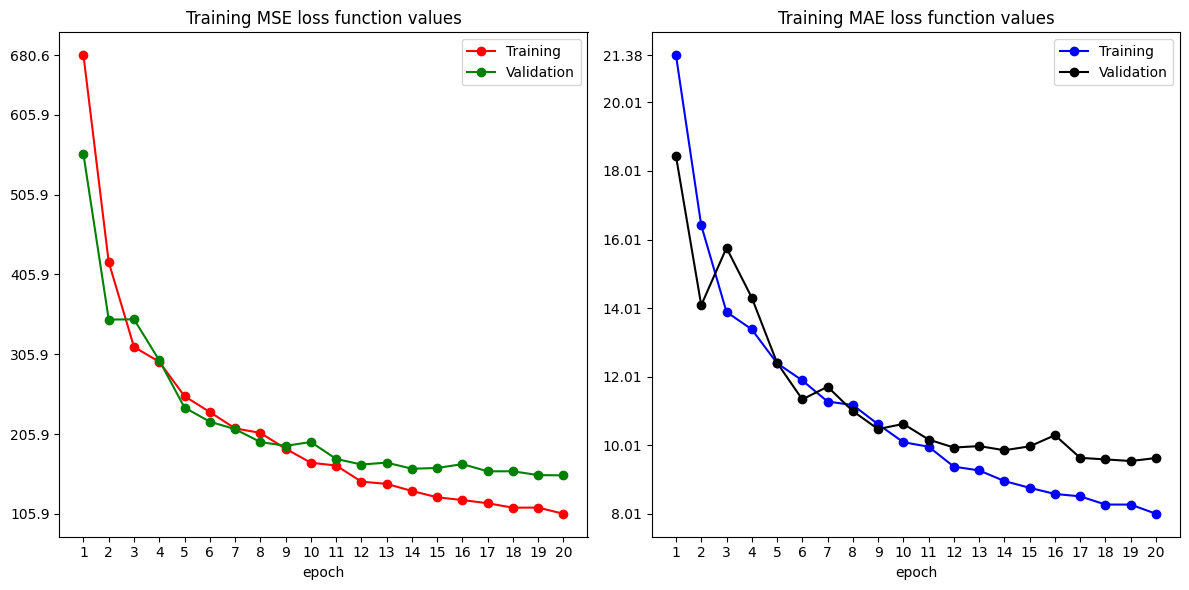

In [200]:
hist = history.history
loss, val_loss = hist.get('loss'), hist.get('val_loss')
mae, val_mae = hist.get('mean_absolute_error'), hist.get('val_mean_absolute_error')

min_loss, max_loss = min(loss + val_loss), max(loss + val_loss)
min_mae, max_mae = min(mae + val_mae), max(mae + val_mae)

xs = range(1, epochs+1)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(xs, loss, 'r-o', label='Training')
axs[0].plot(xs, val_loss, 'g-o', label='Validation')
axs[0].set_title('Training MSE loss function values')
axs[0].set_xlabel('epoch')
axs[0].set_label('MSE loss')
axs[0].set_xticks(xs)
axs[0].set_yticks(np.append(np.arange(min_loss, max_loss, 100), [max_loss]))
axs[0].legend()

axs[1].plot(xs, mae, 'b-o', label='Training')
axs[1].plot(xs, val_mae, 'k-o', label='Validation')
axs[1].set_title('Training MAE loss function values')
axs[1].set_xlabel('epoch')
axs[1].set_label('MAE loss')
axs[1].set_xticks(xs)
axs[1].set_yticks(np.append(np.arange(min_mae, max_mae, 2), [max_mae]))
axs[1].legend()

plt.tight_layout()
plt.show()

In [201]:
mse = keras.losses.MeanSquaredError()
mae = keras.losses.MeanAbsoluteError()
y_pred = model.predict(split_2_prime['x_test'])
print(f"Train losses: MSE={mse(split_2_prime['y_test'], y_pred):.2f} MAE={mae(split_2_prime['y_test'], y_pred):.2f}")

46/46 [==============================] - 5s 78ms/step
Train losses: MSE=1087.11 MAE=26.59


1/1 [==============================] - 0s 105ms/step


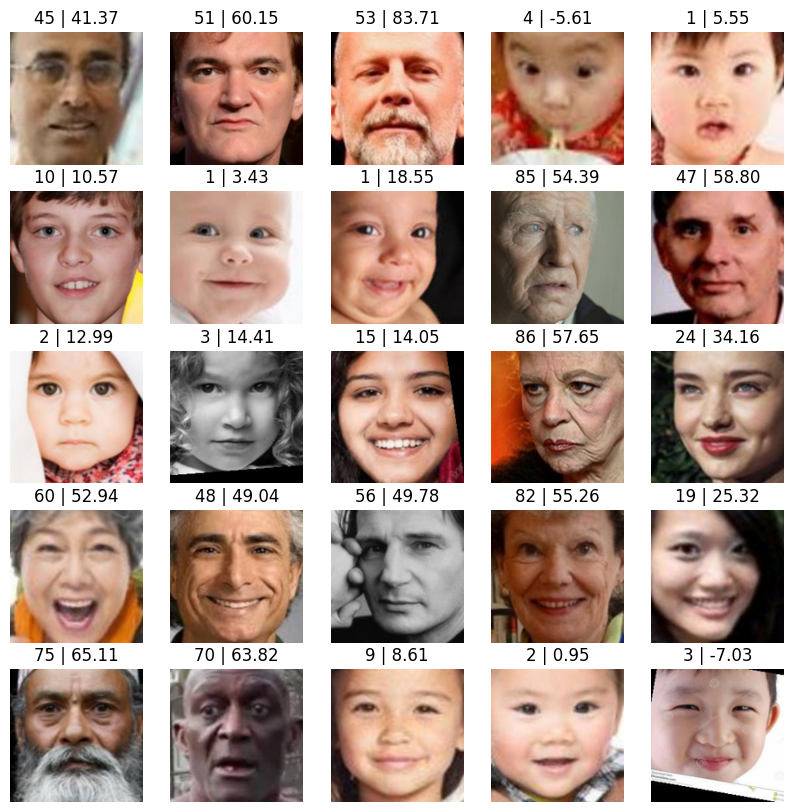

In [202]:
rows, cols = 5, 5
test_shape = split_2_prime['x_test'].shape
rand_idx = np.random.randint(test_shape[0], size=rows*cols)
x_rand = split_2_prime['x_test'][rand_idx]
y_rand = split_2_prime['y_test'][rand_idx]
y_pred = model.predict(x_rand).reshape(-1)

fig = plt.figure(figsize=(10, 10))
for i, x in enumerate(x_rand):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(x)
    plt.title(f"{y_rand[i]} | {y_pred[i]:.2f}")
    plt.axis('off')
plt.show()

In [170]:
from numpy import load

data = load('split_2.npz', allow_pickle=True)
lst = data.files
for item in lst:
    print(item)
    print(data[item])

arr_0
{'x_train': array([[[[0.9254902 , 0.92941177, 0.90588236],
         [0.93333334, 0.92156863, 0.9019608 ],
         [0.9490196 , 0.9098039 , 0.8862745 ],
         ...,
         [0.7921569 , 0.80784315, 0.8117647 ],
         [0.8039216 , 0.81960785, 0.8235294 ],
         [0.8117647 , 0.827451  , 0.83137256]],

        [[0.94509804, 0.9529412 , 0.92941177],
         [0.94509804, 0.9372549 , 0.9137255 ],
         [0.9529412 , 0.9137255 , 0.8901961 ],
         ...,
         [0.8       , 0.8156863 , 0.81960785],
         [0.80784315, 0.8235294 , 0.827451  ],
         [0.8117647 , 0.827451  , 0.83137256]],

        [[0.94509804, 0.95686275, 0.92941177],
         [0.9411765 , 0.9372549 , 0.9137255 ],
         [0.9411765 , 0.90588236, 0.8784314 ],
         ...,
         [0.8       , 0.8156863 , 0.81960785],
         [0.80784315, 0.8235294 , 0.827451  ],
         [0.8156863 , 0.83137256, 0.8352941 ]],

        ...,

        [[0.8352941 , 0.72156864, 0.654902  ],
         [0.89411765, 0.772

In [176]:
    print(split_2_prime['x_train'])

[[[[0.9254902  0.92941177 0.90588236]
   [0.93333334 0.92156863 0.9019608 ]
   [0.9490196  0.9098039  0.8862745 ]
   ...
   [0.7921569  0.80784315 0.8117647 ]
   [0.8039216  0.81960785 0.8235294 ]
   [0.8117647  0.827451   0.83137256]]

  [[0.94509804 0.9529412  0.92941177]
   [0.94509804 0.9372549  0.9137255 ]
   [0.9529412  0.9137255  0.8901961 ]
   ...
   [0.8        0.8156863  0.81960785]
   [0.80784315 0.8235294  0.827451  ]
   [0.8117647  0.827451   0.83137256]]

  [[0.94509804 0.95686275 0.92941177]
   [0.9411765  0.9372549  0.9137255 ]
   [0.9411765  0.90588236 0.8784314 ]
   ...
   [0.8        0.8156863  0.81960785]
   [0.80784315 0.8235294  0.827451  ]
   [0.8156863  0.83137256 0.8352941 ]]

  ...

  [[0.8352941  0.72156864 0.654902  ]
   [0.89411765 0.77254903 0.7058824 ]
   [0.89411765 0.77254903 0.70980394]
   ...
   [0.9137255  0.9137255  0.90588236]
   [0.90588236 0.90588236 0.8980392 ]
   [0.8862745  0.8862745  0.8784314 ]]

  [[0.88235295 0.78039217 0.72156864]
   [0.8